In [ ]:
!wget https://www.dropbox.com/s/3glgtzgiyilo5nj/ImagenesCaras.zip?dl=1 -O ImagenesCaras.zip
!unzip ImagenesCaras.zip -d caras

--2023-05-15 12:37:02--  https://www.dropbox.com/s/3glgtzgiyilo5nj/ImagenesCaras.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/3glgtzgiyilo5nj/ImagenesCaras.zip [following]
--2023-05-15 12:37:02--  https://www.dropbox.com/s/dl/3glgtzgiyilo5nj/ImagenesCaras.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3d2ddeca7e499d71a3eb68d634.dl.dropboxusercontent.com/cd/0/get/B8ECnMs1Mqz-wE6oFNje7WbkpMklRATy3HJZjOvBDGVTyUTi3uTe_fHhVW87FlJunvxt-JZOmf6elN23MHcXqiuKY8-VdAfyDs7xYKy1xZwxX5dJozNDgk6Wbls2s0gGjZaPt0kWGLJpXFDEAnsXc5P5fResRKpmHr6ovvj_bsNa-s3AMlp1h8DxhN5XbE3xTe4/file?dl=1# [following]
--2023-05-15 12:37:03--  https://uc3d2ddeca7e499d71a3eb68d634.dl.dropboxusercontent.com/cd/0/get/B8ECnMs1Mqz-wE6oFNje7WbkpMklRATy3HJZjOv

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
paths = []
imgs = []
for path in sorted(list(Path('caras').rglob('*/*.pgm'))):
    paths.append(path)
    imgs.append(plt.imread(path)[::2,::2])
X = np.stack(imgs)

# CHUSMEO QUE ONDA LOS DATOS

Tengo mis caras viviendo en X, el cual es una lista de listas (aplanadas), si no le hago el ::2 arriba tiene 90ypico valores, si se lo hago tiene 46.

Sin: [131 129 127 128 125 131 123 132 133 124 125 129 132 125 128 133 127 130
 129 127 125 128 128 129 126 122 122 127 132 125 121 114 113 107 112 112
 107 101  98 103  95  90  96  91  87  87  86  85  88  83  88  87  87  86
  83  83  83  83  91  91  98  88  90  97  95  88  94 106 114 118 118 117
 123 128 123 120 119 120 120 121 121 115 121 119 121 116 119 118 118 117
 114 111]

Con: [131 127 125 123 133 125 132 128 127 129 125 128 126 122 132 121 113 112
 107  98  95  96  87  86  88  88  87  83  83  91  98  90  95  94 114 118
 123 123 119 120 121 121 121 119 118 114]
____________________________________________________________________
 El primer indice de X me da la CARA que quiero.
 
 El segundo indice son las filas de la cara.
 
 El terceo las columnas.
 
 Es decir, si busco el valor de un solo pixel, tengo que hacer X[i][j][k]

In [ ]:
print(X[0][0][0])

131


Cuando hace Coref numpy, usa la siguiente formula:
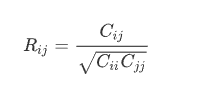

Por lo que en la matriz resultante, tenemos en Rij la relacion de la celda Cij con las celdas diagonales.

PERO, NOTAR la matriz C es la matriz de covarianza, es decir hay un paso que se nos esta ocultando.
La matriz de covarianza tiene en Cii la varianza de Xi, y en Cij la covarianza de Xi y Xj

#ENCARO EL ENUNCIADO DEL TP.

a) Implementar una funcion (Python) que dado el conjunto de imagenes obtiene la
representacion z en el espacio de menor dimension para PCA y 2DPCA para un
determinado k. Utilizar la implementacion de autovectores previa. Notar que no
es necesario volver a calcular todos los autovalores y autovectores para cada valor
de k.

Para encontrar Z, tengo que aplanar mis imagenes, obteniendo vectores de largo *n*, apilar mis *m* imagenes, obteniendo una matriz de R*mxn* que voy a llamar Y. 

Despues calculo el promedio columna, u_j, sumando componente a componente en la columna y dividiendo por el largo, que seria m.

Con ese promedio columna calculado, centro mis vectores de Y, restantole a cada uno de los valores el u_j pertinente. Y estos nuevos vectores forman la matriz X_c.

Si multiplico (X_ct * X_c)/(n-1) obtengo una matriz C, simetrica a la cual le saco los autovalores y autovectores, me los guardo y despues uso la cantidad *k* a eleccion para armar z, donde:

 zi = (vt1xi,vt2xi, . . . , vtkxi)

 zi = xiVk donde Vk se obtiene a partir de las primeras k columnas de V la matriz de autovectores.

In [ ]:
flattened = []
for image in X:
  flattened.append(image.flatten())

In [ ]:
flattened[0]

array([131, 127, 125, ...,  29,  25,  30], dtype=uint8)

In [ ]:
Y = np.stack(flattened)


In [ ]:
promedios_columna = []
cantidad_filas = len(Y)
cantidad_columnas = len(Y[0])
# itero fila a fila(i), pasando por el indice j de la misma y sumando, para luego dividir y guardar el resultado
for j in range(cantidad_columnas):
  sumatoria = 0
  for i in range(cantidad_filas):
    sumatoria += Y[i][j]

  promedio = sumatoria / cantidad_filas
  promedios_columna.append(promedio)

In [ ]:
Y_c = []
for i in range(cantidad_filas):
  fila_i = []
  for j in range(cantidad_columnas):
    valor_centrado = Y[i][j] - promedios_columna[j]
    fila_i.append(valor_centrado)
  Y_c.append(fila_i)

In [ ]:
X_ct = np.array(Y_c).T
X_c = np.array(Y_c)

C = (X_ct @ X_c) / (cantidad_columnas - 1)

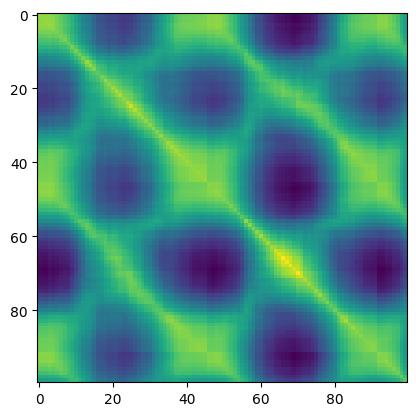

In [ ]:
plt.imshow(C[0:100, 0:100])